In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets

# 讀入鳶尾花資料/了解欄位資訊
* 花萼長度(Sepal Length)
* 花萼寬度(Sepal Width)
* 花瓣長度(Petal Length)
* 花瓣寬度(Petal Width)

In [97]:
iris = sklearn.datasets.load_iris()
data = pd.DataFrame(iris['data'])
data.columns = iris['feature_names']
data['label'] = iris['target']
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 指定距離計算方式

In [98]:
## 計算歐式距離

def distance(X1, X2):
  d = np.power(X1 - X2, 2)
  d = np.sqrt(sum(d))
  return(d)

# K平均分群演算法

In [163]:
def kmeans(X, n_clusters, seed):
  
  ## 初始分群：隨機找 n 個樣本當群中心

  sampler = np.random.RandomState(seed)
  centers = X[sampler.permutation(X.shape[0])[:n_clusters],:]
  members = np.array([None for i in range(X.shape[0])])

  ## 重新計算群成員、群中心位置

  while True:

    ## 計算每個樣本和每個群之距離

    for i in range(X.shape[0]):
      opt_d = np.Infinity
      opt_c = None
      for j in range(n_clusters):
        d = distance(X[i,:], centers[j,:])
        if(d < opt_d):
          opt_d = d
          opt_c = j
      members[i] = opt_c

    ## 如果群組成不變，則視為收斂(停止運算)

    new_centers = np.array([X[(members == i)].mean(0) for i in range(n_clusters)])
    if np.all(centers == new_centers):
      break
    else:
      centers = new_centers
  return centers, members

# 使用鳶尾花資料進行分群

In [184]:
X = np.array(data.iloc[:, 0:2])
centers, members = kmeans(X, 3, 10)

# 繪圖觀察分群結果

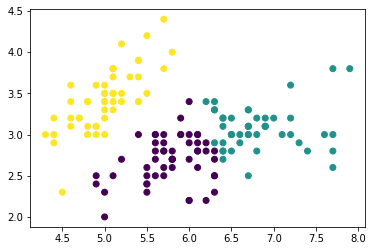

In [185]:
plt.scatter(X[:,0], X[:,1], c = members)